In [63]:
def factorial(num):
    if(num == 1):
        return 1;
    return num*factorial(num-1);

In [64]:
print(factorial(5))

120


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
np.set_printoptions(threshold=np.inf)
import math

In [2]:
C = np.random.rand(100,100)*100
P = np.zeros( (100, 100) )

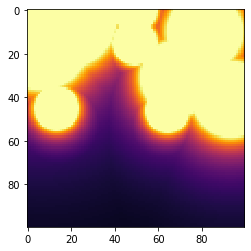

In [3]:
centers = np.random.randint(100, size=(5, 2) )
for k in range(5):
    for i in range(100):
        for j in range(100):
            x = centers[k, 0]
            y = centers[k, 1]
            if(i == x and j == y):
                P[i, j] = 100
                continue
            power = 100/((i-x)**2 + (j-y)**2 )
            if(power > P[i, j]):
                P[i, j] = power

centers = np.random.randint(100, size=(3, 2) )
for k in range(3):
    for i in range(100):
        for j in range(100):
            x = centers[k, 0]
            y = centers[k, 1]
            if(i == x and j == y):
                P[i, j] = 300
                continue
            power = 300/((i-x)**2 + (j-y)**2 )
            if(power > P[i, j]):
                P[i, j] = power

centers = np.random.randint(100, size=(2, 2) )
for k in range(2):
    for i in range(100):
        for j in range(100):
            x = centers[k, 0]
            y = centers[k, 1]
            if(i == x and j == y):
                P[i, j] = 300
                continue
            power = 500/((i-x)**2 + (j-y)**2 )
            if(power > P[i, j]):
                P[i, j] = power

norm = plt.Normalize(0, 1, clip=True)
plt.imshow(P, interpolation="none",  cmap="inferno", norm=norm)

In [4]:
counter = 0
for x in range(100):
    for y in range(100):
        if(P[x, y] >= 1):
            counter += math.floor(C[x, y])
print(counter)

207738


In [4]:
M = np.zeros((15, 15))
M[2, 1] = 1 # point (3, 2)
M[2, 12] = 1
M[4, 12] = 1
M[4, 14] = 1
M[9, 14] = 1
M[9, 1] = 1

In [5]:
def find_start(matrix):
    for i in range(15):
        for j in range(15):
            if( matrix[i, j] != 0):
                return (i, j)

In [60]:
def check_top(matrix, x, y):
    for i in range(y-1, -1, -1):
        if(matrix[x, i] != 0):
            return (x, i);
    return (-1, -1)
def check_bottom(matrix, x, y):
    for i in range(y+1, 15):
        if(matrix[x, i] != 0):
            return (x, i);
    return (-1, -1)
def check_left(matrix, x, y):
    for i in range(x-1, -1, -1):
        if(matrix[i, y] != 0):
            return (i, y);
    return (-1, -1)
def check_right(matrix, x, y):
    for i in range(x+1, 15):
        if(matrix[i, y] != 0):
            return (i, y);
    return (-1, -1)

def find_direction_top(matrix, current_node):
    direction = 't'
    potential_node = check_right(matrix, *current_node)
    if(potential_node == (-1, -1)):
        potential_node = check_top(matrix, *current_node)
        if(potential_node == (-1, -1)):
            potential_node = check_left(matrix, *current_node)
            return( ('l', potential_node) )
        else: 
            return( ('t', potential_node) )
    else:
        return( ('r', potential_node) )

def find_direction_right(matrix, current_node):
    direction = 'r'
    potential_node = check_bottom(matrix, *current_node)
    if(potential_node == (-1, -1)):
        potential_node = check_right(matrix, *current_node)
        if(potential_node == (-1, -1)):
            potential_node = check_top(matrix, *current_node)
            return( ('t', potential_node) )
        else: 
            return( ('r', potential_node) )
    else:
        return( ('b', potential_node) )
    
def find_direction_bottom(matrix, current_node):
    direction = 'b'
    potential_node = check_left(matrix, *current_node)
    if(potential_node == (-1, -1)):
        potential_node = check_bottom(matrix, *current_node)
        if(potential_node == (-1, -1)):
            potential_node = check_right(matrix, *current_node)
            return( ('r', potential_node) )
        else: 
            return( ('b', potential_node) )
    else:
        return( ('l', potential_node) )
    
def find_direction_left(matrix, current_node):
    direction = 'l'
    potential_node = check_top(matrix, *current_node)
    if(potential_node == (-1, -1)):
        potential_node = check_left(matrix, *current_node)
        if(potential_node == (-1, -1)):
            potential_node = check_bottom(matrix, *current_node)
            return( ('b', potential_node) )
        else: 
            return( ('l', potential_node) )
    else:
        return( ('t', potential_node) )
        
def find_all_nodes(matrix):
    starting_node = find_start(matrix)
    current_node = starting_node
    direction = 'b'
    node_list = []
    
    (direction, current_node) = find_direction_bottom(matrix, current_node)
    node_list.append(current_node)
    while(current_node != starting_node):
        if(direction == 'b'):
            (direction, current_node) = find_direction_bottom(matrix, current_node)
        elif(direction == 'l'):
            (direction, current_node) = find_direction_left(matrix, current_node)
        elif(direction == 't'):
            (direction, current_node) = find_direction_top(matrix, current_node)
        elif(direction == 'r'):
            (direction, current_node) = find_direction_right(matrix, current_node)
        node_list.append(current_node)
        
    result = "Старт: "
    for i in range(-1, len(node_list)):
        result += '('
        result += str(node_list[i][0] + 1)
        result += ', '
        result += str(node_list[i][1] + 1)
        result += ') -> '
    result = result[:-3] + ' Конец'
    print(result)

In [61]:
find_all_nodes(M)

Старт: (3, 2) -> (3, 13) -> (5, 13) -> (5, 15) -> (10, 15) -> (10, 2) -> (3, 2)  Конец
